In [2]:
model_type = "model_rf"

In [3]:
import sys
sys.path.append(rf'Classification\titanic\{model_type}')

In [4]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import dalex
from sklearn.inspection import PartialDependenceDisplay
import shap

In [5]:
yaml_path = rf"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\{model_type}\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

# Params

In [6]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])


X_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_train'])   
    
y_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_train'])
    
params_ = {
        'X_train_feat_sel': X_train_feat_sel,
        'y_train_feat_sel': y_train_feat_sel,
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

# Read Train / val dataset

In [7]:
X_train = pd.read_parquet(params_['X_train_feat_sel'])
y_train = pd.read_parquet(params_['y_train_feat_sel'])   

X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])    

In [9]:
X_train

,numerical_pipe_con__Age,numerical_pipe_con__Fare,numerical_pipe_dis__SibSp,numerical_pipe_dis__Parch,numerical_pipe_dis__FamilySize,numerical_pipe_dis__IsAlone,categorical_pipe__Pclass_3,categorical_pipe__Pclass_2,categorical_pipe__Sex_male,categorical_pipe__Cabin_missing,categorical_pipe__Embarked_S,categorical_pipe__Embarked_C,categorical_pipe__Ticket_1p_3,categorical_pipe__Ticket_1p_2,categorical_pipe__Ticket_1p_Rare,categorical_pipe__Cabin_1p_missing,categorical_pipe__Embarked_mod_SQ,categorical_pipe__Embarked_mod_C
91,-0.701274,-0.521652,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,1,0,0,1,1,0
114,-0.933379,-0.378308,0.000,0.000000,0.0,1.0,1,0,0,1,0,1,0,1,0,1,0,1
657,0.227144,-0.355697,0.125,0.166667,0.2,0.0,1,0,0,1,0,0,1,0,0,1,1,0
778,-0.082329,-0.524185,0.000,0.000000,0.0,1.0,1,0,1,1,0,0,1,0,0,1,1,0
146,-0.159697,-0.522920,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.082329,2.488153,0.125,0.000000,0.1,0.0,0,0,0,0,0,1,0,0,1,0,0,1
488,0.072408,-0.517402,0.000,0.000000,0.0,1.0,1,0,1,1,1,0,0,0,1,1,1,0
40,0.846090,-0.486472,0.125,0.000000,0.1,0.0,1,0,0,1,1,0,0,0,1,1,1,0
742,-0.623906,5.002808,0.250,0.333333,0.4,0.0,0,0,0,0,0,1,0,0,1,0,0,1


In [8]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_{config['model']['model_version']}.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

# Drop columns

In [10]:
X_train.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)


# Partial dependence plot

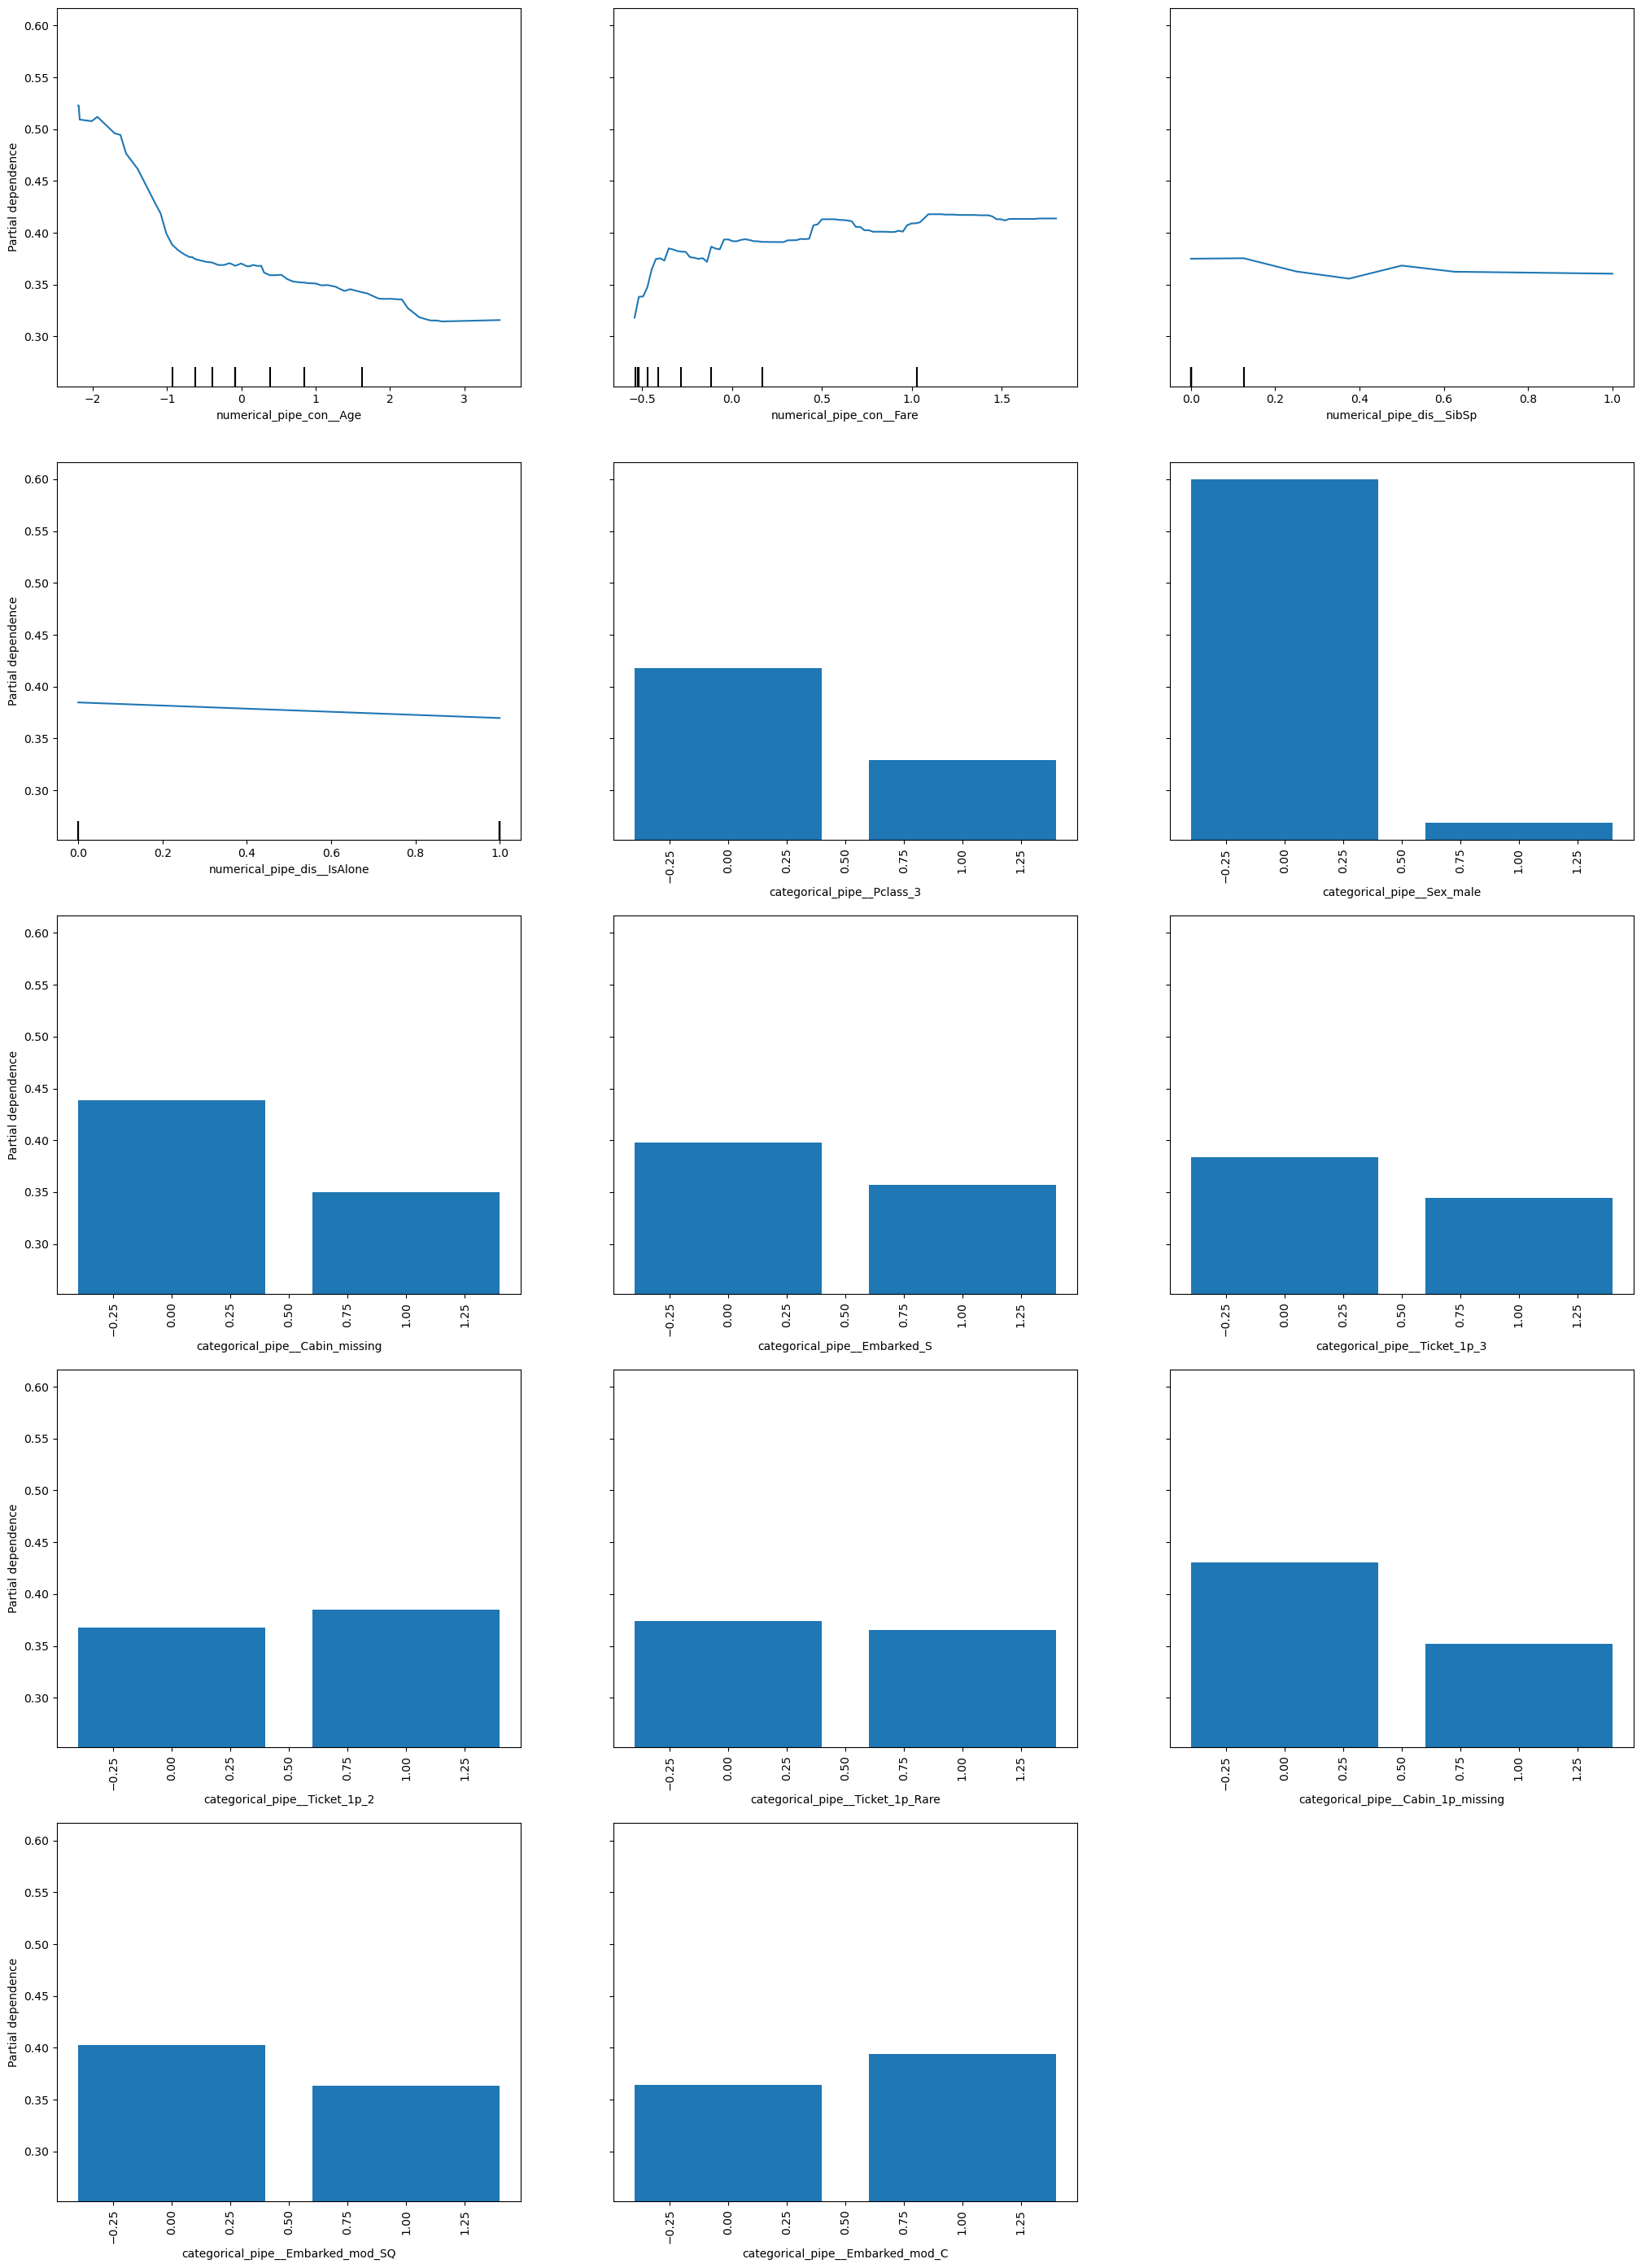

In [11]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [12]:
X_val_proba = model.predict_proba(X_val)

In [17]:
explainer = shap.Explainer(model, X_train)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=200,
                                        random_state=23))])

In [16]:
shap_values_train = explainer(X_train)
shap_values_val = explainer(X_val)

NameError: name 'explainer' is not defined

In [ ]:
# Classe positiva (geralmente índice 1)
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train
)

In [ ]:
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train,
    plot_type="bar"
)


In [ ]:
X_val.loc[727]

In [ ]:
shap.plots.waterfall(shap_values_val[0,:,1])

In [ ]:
for col in X_val.columns:
    shap.plots.scatter(shap_values_train[:,col,1])